In [9]:
import MagLearn
import numpy as np
import torch

# Import data

In [ ]:
# Change the path to your own path
csv_folder_path=r"testing"

data_b = np.loadtxt(csv_folder_path+r'\B_waveform.csv', delimiter=',').astype(np.float32)
data_temp = ((np.loadtxt(csv_folder_path+r'\Temperature.csv', delimiter=',') + 273.15).astype(np.float32))[:,np.newaxis]
data_freq = (np.loadtxt(csv_folder_path+r'\Frequency.csv', delimiter=',').astype(np.float32))[:,np.newaxis]

# Inference data

In [11]:
## Option to run 100 flips and average - slow!
# pred_loss=MagLearn.MagLoss_percise(
#     data_b,
#     data_temp,
#     data_freq,
#     )

pred_loss=MagLearn.MagLoss(
    data_b,
    data_temp,
    data_freq,
    )

c:\Users\1\Desktop\PHD\Maglearn\Github_MagLearn1\Deployment\MagLearn.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_saved_name, 

# Save pred_loss to csv

In [12]:
np.savetxt(r'3C90_pred_loss.csv', pred_loss, delimiter='\n')

# Plot

Max relative error (%): 0.12543415215338488
95th percentile of relative error (%): 0.04031583841853304
Mean of relative error (%): 0.014825457883085346
Maximum error occurs at index: 1869
Maximum error value: 0.12543415215338488


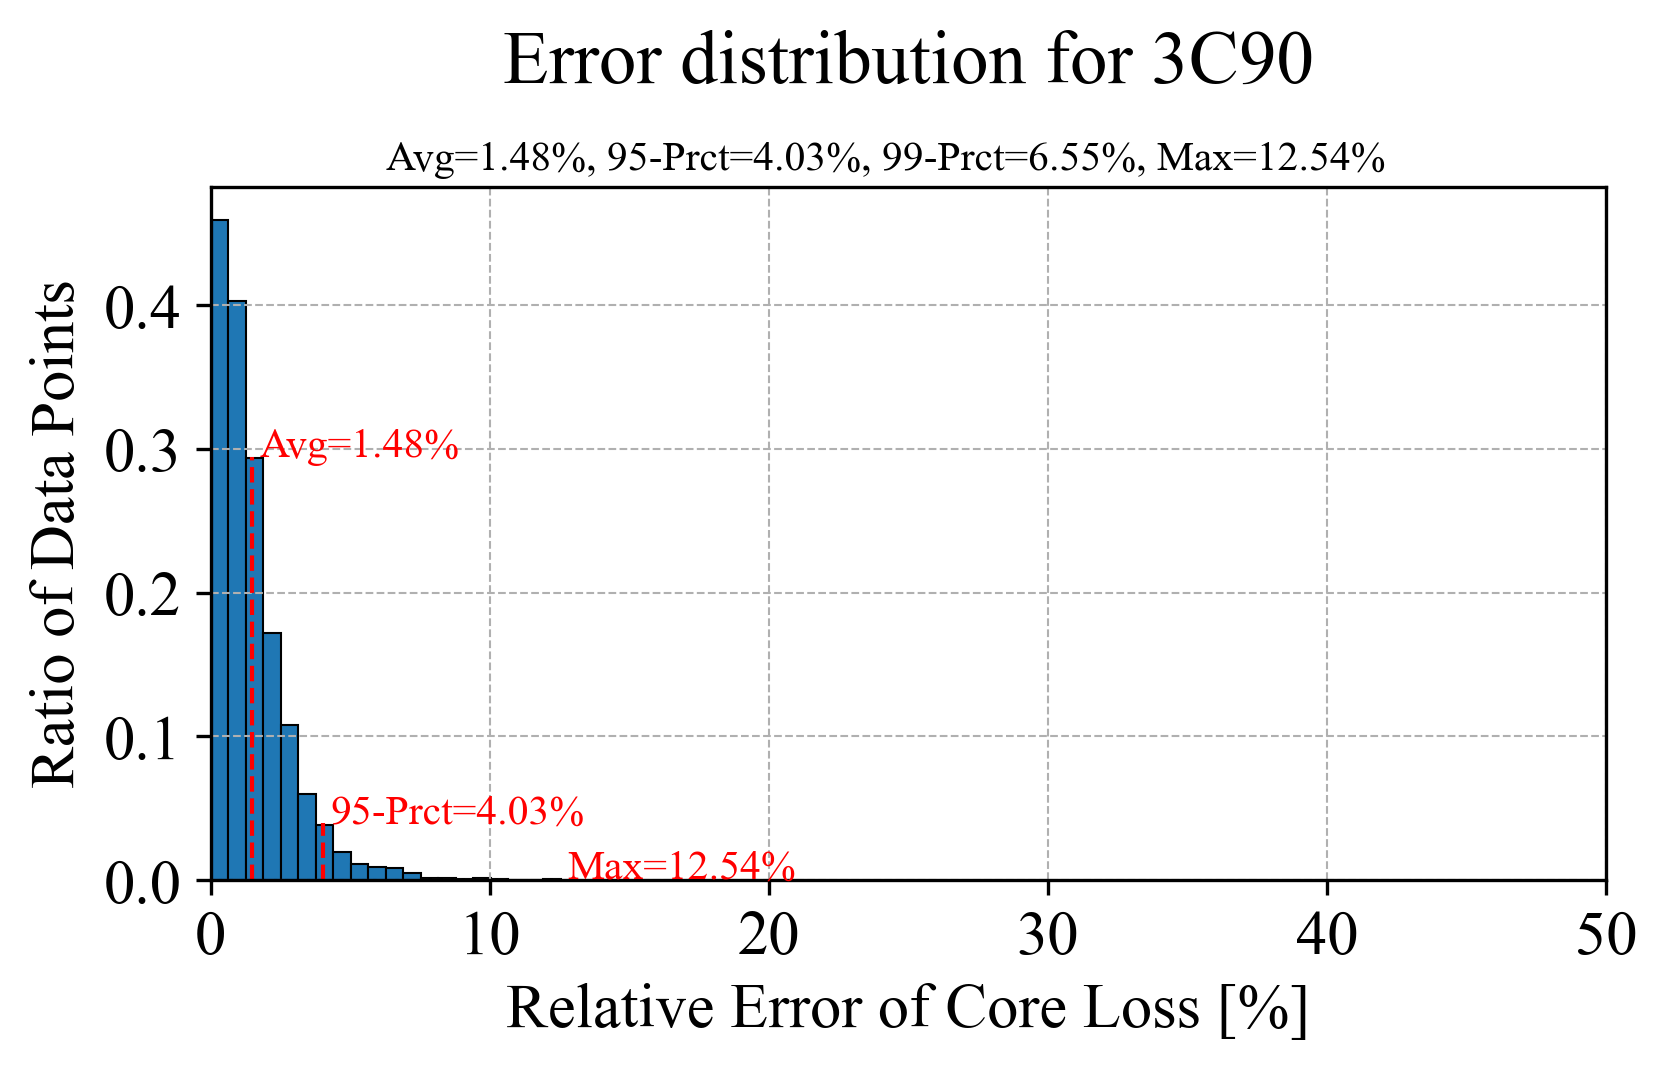

In [14]:
true_values = np.loadtxt("testing/Volumetric_Loss.csv", delimiter=",")
pred_loss = pred_loss.flatten()
relative_loss = np.abs(pred_loss - true_values) / np.abs(true_values)

plt_perc95=np.percentile(relative_loss,95)
plt_perc99=np.percentile(relative_loss,99)
plt_avg=np.mean(relative_loss)
plt_max=np.max(relative_loss)

max_index = np.argmax(relative_loss)
max_error = relative_loss[max_index]

print("Max relative error (%):", np.max(relative_loss))
print("95th percentile of relative error (%):", np.percentile(relative_loss, 95))
print("Mean of relative error (%):", np.mean(relative_loss))

print("Maximum error occurs at index:", max_index)
print("Maximum error value:", max_error)


error_plot=MagLearn.Mag_plot(
    "3C90",
    relative_loss,
    )